# pydicos tutorial

This notebook will run you through the basic data manipulations available with pydicos. Enjoy !

## dcs objects

DICOS objects in this library can be of 3 types : CT (3D volume), DX (2D image) and TDR (Treat Detection Report). Each object have different specific attributes that will be reviewed below.

### DX

DX are X-Ray images. Let's see how to properly create a DX object from a .png file

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pydicos

In [2]:
imgpath = "samples/xrayimage.png"
img = 1000*cv2.imread(imgpath, -1)[:,:,0].astype(np.uint16)

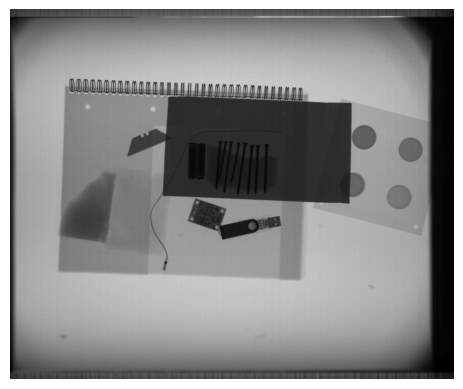

In [3]:
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [4]:
mydx = pydicos.DXLoader()
mydx.set_data(img)

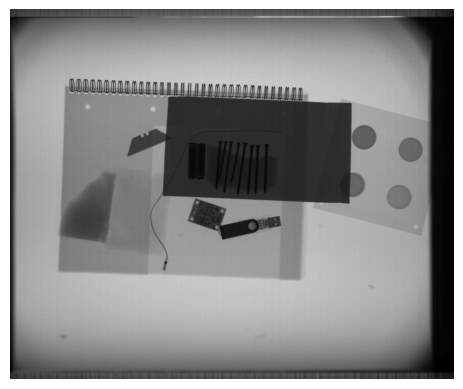

In [5]:
plt.imshow(mydx.get_data(), cmap="gray")
plt.axis("off")
plt.show()

### CT

DX are X-Ray computed tomography volumes. Let's see how to properly create a CT object from a .mhd file.

In [6]:
import skimage.io as io
from vedo import Volume
import pydicos

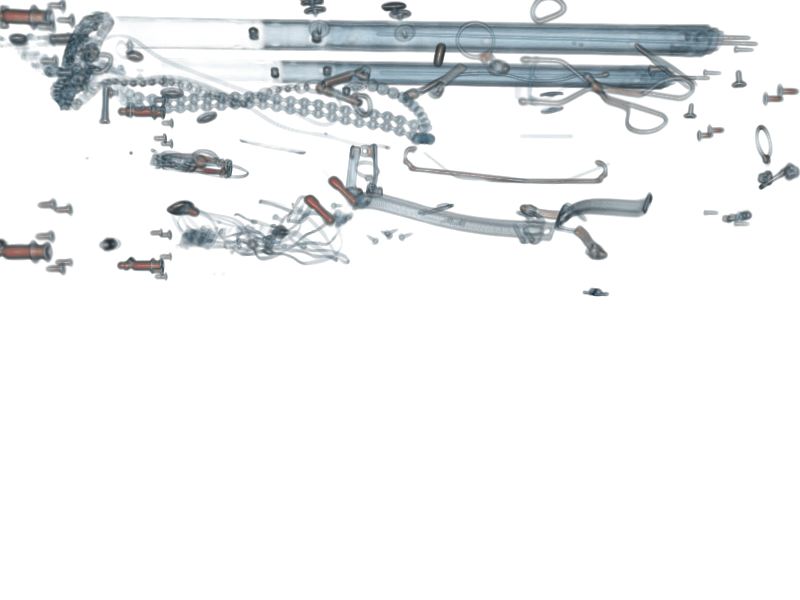

In [7]:
volpath = "samples/xrayvolume.mhd"
vol = Volume(io.imread(volpath, plugin='simpleitk'))
vol.show()

In [8]:
myct = pydicos.CTLoader()
data = [vol.tonumpy()]
myct.set_data([vol.tonumpy()])

782420620


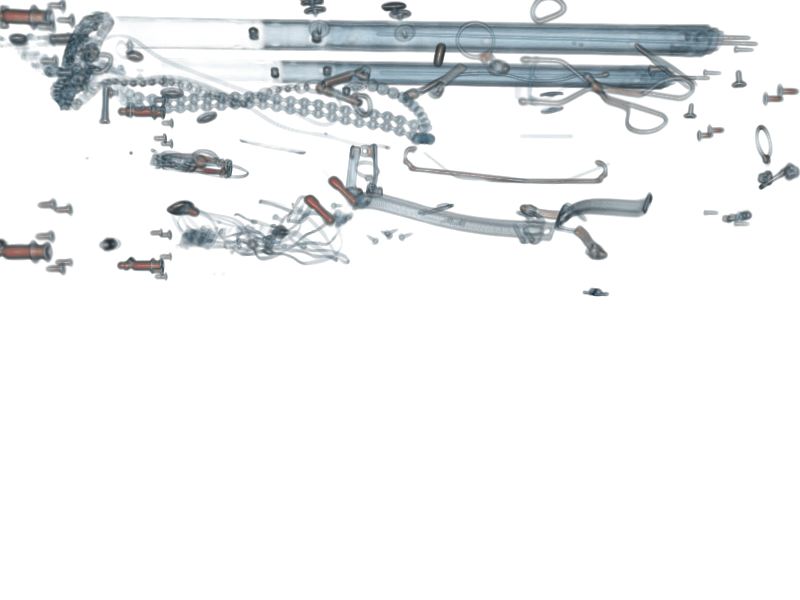

In [9]:
display = myct.get_data()
vol2 = Volume(display[0])
vol2.show()

### TDR

DX are detection report objects. Let's see how to properly create a TDR object from a model's detections.

In [10]:
import numpy as np
import pydicos

In [11]:
mydetections = [
    {
        "x": 100,
        "y": 200,
        "z": 300,
        "w": 50,
        "h": 60,
        "d": 70,
        "mask": np.ones((50, 60, 70)),
        "score": 0.8,
        "label": "Gun"
    },
    {
        "x": 400,
        "y": 500,
        "z": 600,
        "w": 20,
        "h": 30,
        "d": 40,
        "mask": np.ones((20, 30, 40)),
        "score": 0.3,
        "label": "Explosive"
    }
]

In [ ]:
mytdr = pydicos.TDRLoader()
# mytdr.set_data(mydetections)  <-- not yet implemented